In [389]:
# This is Homework 07a (Ames Housing Part I - EDA and Cleaning) 
# of the "Data Science" class at Technische Hochschule Rosenheim

In [390]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [391]:
# make the plots look nice
sns.set(style="darkgrid")
snscolor='mediumseagreen'
sns.set(font_scale=0.7) 

# The Ames Housing Dataset - Part I

The data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010. The data has 82 columns which include 23 nominal, 23 ordinal, 14 discrete, and 20 continuous variables (and 2 additional observation identifiers). Quality of the data is overall good, but there may be some outliers. 

You can find a detailed description of all attributes in `'data/DataDocBrief.txt'`. 

**Start by studying the attributes!**

We intend to use this data to predict the value (`SalePrice`) of a property given its attributes. Clearly, the above ground living area (`GrLivArea`, in German: Wohnfläche) will be the most important indicator, but many others will influence the price as well. 

## Load and explore the data

In [392]:
# The first column (Order) is the index key, all others columns are data columns
columns = ['Order','PID', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir',
       'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars',
       'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'PoolQC', 'Fence', 'MiscFeature',
       'MiscVal', 'MoSold', 'YrSold', 'SaleType', 'SaleCondition',
       'SalePrice']
columns_discrete = ['YearBuilt', 'YearRemodAdd', 'BsmtFullBath', 'BsmtHalfBath',
                    'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 
                    'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 'GarageCars', 
                    'MoSold', 'YrSold']
columns_continuous = ['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 
                      'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
                      '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'GarageArea',
                      'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
                      'ScreenPorch', 'PoolArea', 'MiscVal', 'SalePrice']

columns_numeric = columns_discrete + columns_continuous
columns_categorical = [c for c in columns if not (c in columns_numeric or c=='Order')]

In [393]:
# construct the column types
# set all columns to str by default and change the numeric ones to float
col_types = {c : str for c in columns} 
col_types = {**col_types, **{c : float for c in columns_numeric}}

In [394]:
ames = pd.read_excel('data/AmesHousing.xls', index_col='Order', names=columns, dtype = col_types)

### Exercise I.1

The dataframe we just read does contain NaN values (missing values), however, in reality, the data does not contain missing values. Replace all NaN values by `0` for numeric columns and by `'NA'` for nominal columns.

In [395]:
# ---------- SOLUTIONS ----------

for c in ames.columns:
    if ames[c].value_counts().sum() != len(ames):
        if c in columns_numeric:
            ames.replace(np.nan, 0, inplace=True)
        elif c in columns_categorical:
            ames.replace(np.nan, "NA", inplace=True)

## EDA

### Exercise I.2

Explore the results of the following `describe` function carefully. You will note one very obvious error in the data. Explore the affected feature visually, decide how to handle this mistake and implement your solution.

In [396]:
ames.describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,2930.0,57.647782,33.499441,0.0,43.00,63.0,78.00,313.0
LotArea,2930.0,10147.921843,7880.017759,1300.0,7440.25,9436.5,11555.25,215245.0
YearBuilt,2930.0,1971.356314,30.245361,1872.0,1954.00,1973.0,2001.00,2010.0
YearRemodAdd,2930.0,1984.266553,20.860286,1950.0,1965.00,1993.0,2004.00,2010.0
MasVnrArea,2930.0,101.096928,178.634545,0.0,0.00,0.0,162.75,1600.0
BsmtFinSF1,2930.0,442.478498,455.586452,0.0,0.00,370.0,734.00,5644.0
BsmtFinSF2,2930.0,49.705461,169.142089,0.0,0.00,0.0,0.00,1526.0
BsmtUnfSF,2930.0,559.071672,439.540571,0.0,219.00,465.5,801.75,2336.0
TotalBsmtSF,2930.0,1051.255631,440.968018,0.0,793.00,990.0,1301.50,6110.0
1stFlrSF,2930.0,1159.557679,391.890885,334.0,876.25,1084.0,1384.00,5095.0


2261


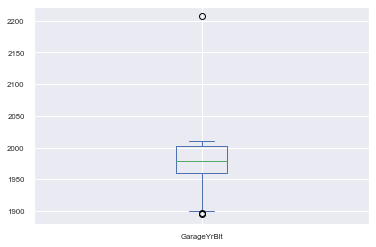

In [397]:
#---------- SOLUTION ----------
ames.GarageYrBlt[ames.GarageYrBlt > 0].plot(kind="box");
maxIndex = ames.GarageYrBlt[ames.GarageYrBlt == max(ames.GarageYrBlt)].index[0]
print(maxIndex)

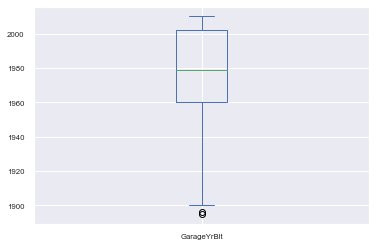

In [398]:
ames.loc[maxIndex, "GarageYrBlt"] = 2007
ames.GarageYrBlt[ames.GarageYrBlt > 0].plot(kind="box");

### Univariate EDA

Let's explore the univariate distributions of each feature.

### Exercise I.3

* visualize the target with an appropriate visualization and interpret the result
* visualize the continuous features with an appropriate visualization and interpret the result
* visualize the discrete features with an appropriate visualization and interpret the result
* visualize the categorical features with an appropriate visualization and interpret the result

<Axes: ylabel='Frequency'>

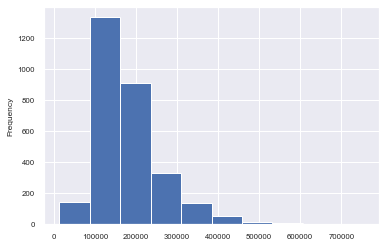

In [399]:
#---------- SOLUTION ----------
ames.SalePrice.plot(kind="hist")
# most houses were sold for less than 250k with some super expensive ones at the top. very few below 100k

In [400]:
# for c in columns_continuous:
#     ames[c][ames[c] > 0].plot(kind="kde", figsize=(20,1), legend=True)
#     plt.show()

# for c in columns_discrete:
#     ames[c].plot(kind="hist", figsize=(20,1), legend=True)
#     plt.show()

# for c in columns_categorical:
#     if c != "PID":
#         ames[c].value_counts().plot(kind="bar", figsize=(20,1))
#         plt.show()


### Bivariate EDA and Outlier removal

A reasonable next step is look at the relationship between the target and some of the features we know from our domain knowledge to be important. To keep the number of graphs (and runtime) reasonable, we selected the four features `GrLivArea`, `YearBuilt`, `LotArea`, `TotRmsAbvGrd` plus the target `SalePrice`.

### Exercise I.4

* Visualize these feature with a pair plot. 
* Interpret the visualizations, in particular, look for Outliers. 

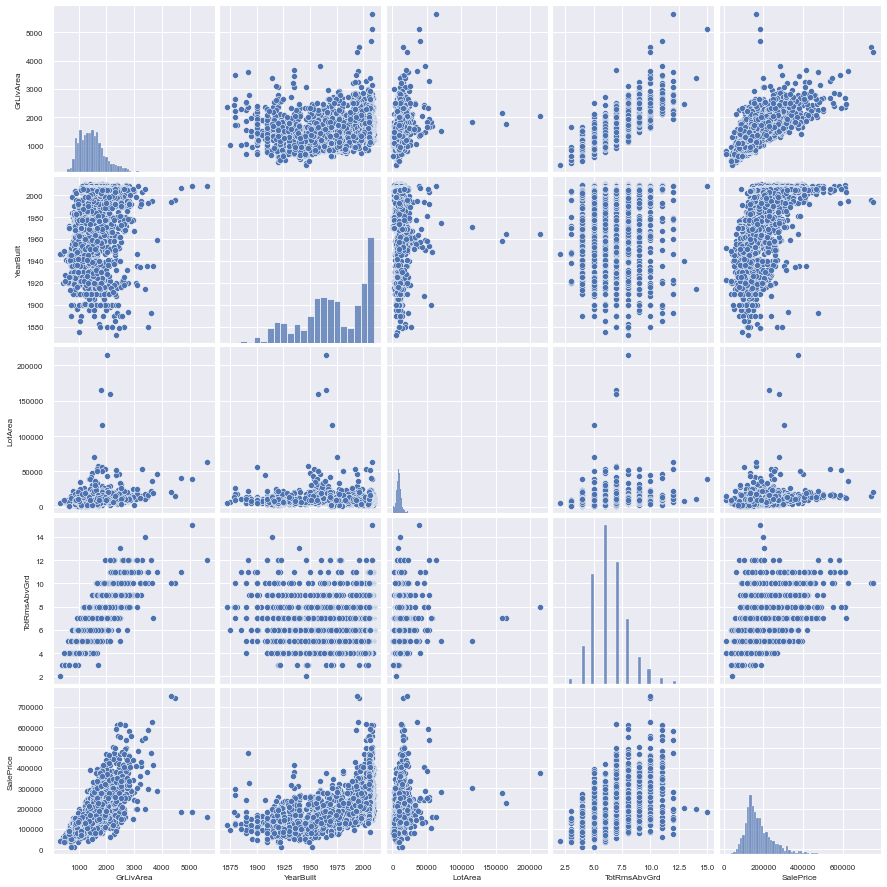

In [401]:
#---------- SOLUTION ----------
ames4 = ames.loc[:, ["GrLivArea", "YearBuilt", "LotArea", "TotRmsAbvGrd", "SalePrice"]]
sns.pairplot(ames4);
# LotArea has outliers

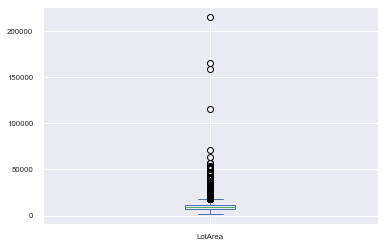

In [402]:
ames4.LotArea.plot(kind="box")
outlierIndex = ames4[ames4["LotArea"] > 100000].index
outlierIndex
ames4.loc[outlierIndex, "LotArea"] = 0


<Axes: >

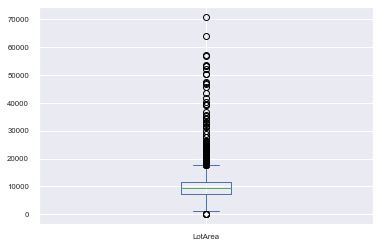

In [403]:
ames4.LotArea.plot(kind="box")

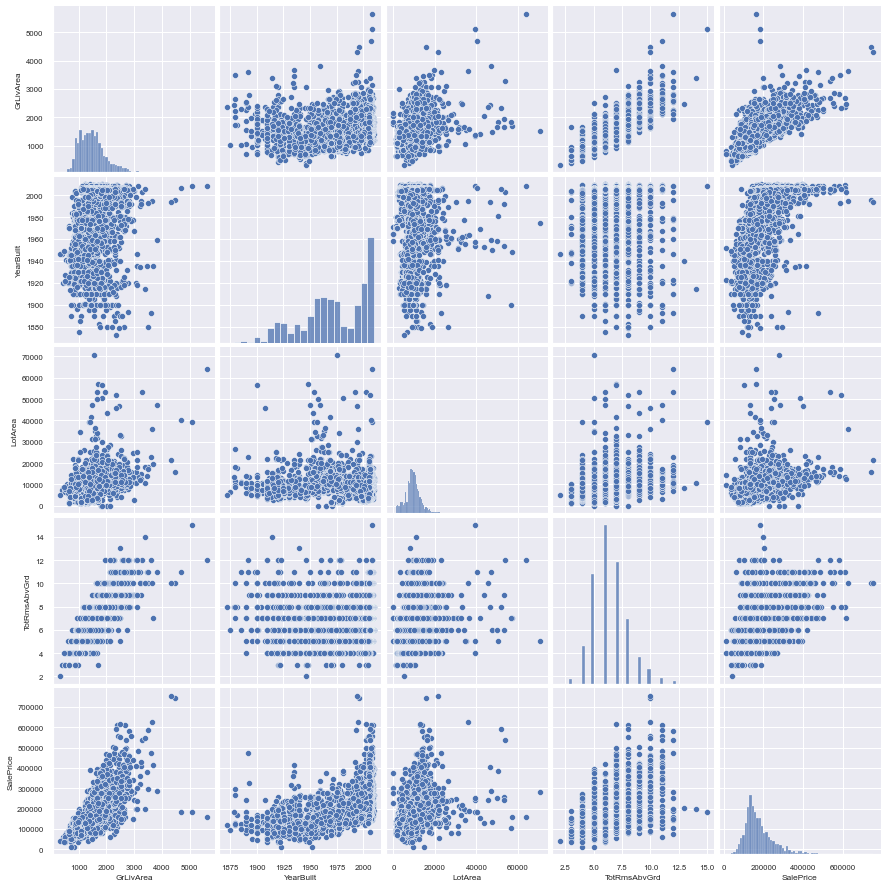

In [404]:
sns.pairplot(ames4);

,GrLivArea,YearBuilt,LotArea,TotRmsAbvGrd,SalePrice
Order,,,,,
1499,5642.0,2008.0,63887.0,12.0,160000.0
2181,5095.0,2008.0,39290.0,15.0,183850.0
2182,4676.0,2007.0,40094.0,11.0,184750.0
1761,4476.0,1996.0,15623.0,10.0,745000.0
1768,4316.0,1994.0,21535.0,10.0,755000.0
...,...,...,...,...,...
2654,492.0,1921.0,7830.0,3.0,61500.0
2881,480.0,1949.0,9000.0,4.0,35311.0
908,438.0,1920.0,8400.0,3.0,60000.0


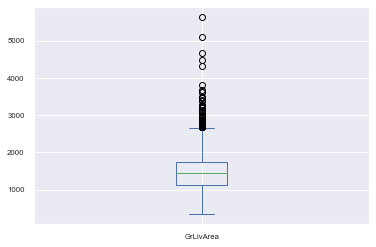

In [405]:
ames4.GrLivArea.plot(kind="box")
ames4.sort_values(by="GrLivArea", ascending=False)
# top 3 are outliers again

Index([1499, 2181, 2182], dtype='object', name='Order')
1442.0


<Axes: >

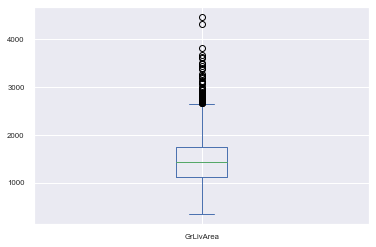

In [406]:
outlierIndex2 = ames4.GrLivArea.sort_values(ascending=False).index[:3]
print(outlierIndex2)
median_wo_outliers = ames4.loc[~ames4.index.isin(outlierIndex2), "GrLivArea"].median()
print(median_wo_outliers)
ames4.loc[outlierIndex2, "GrLivArea"] = median_wo_outliers
ames4.GrLivArea.plot(kind="box")

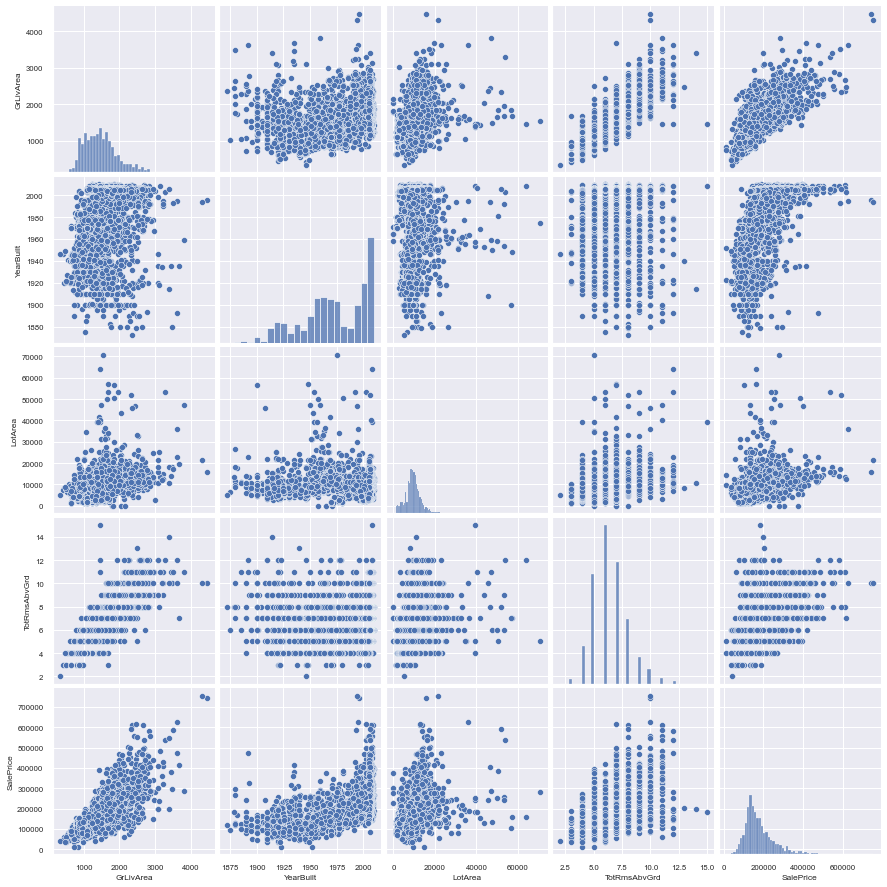

In [407]:
sns.pairplot(ames4)

### Exercise I.5

You should have found 5 very obvious Outliers (plus a few more that are not that clearly anomalous). 

* Decide what to do with the Outliers
* Implement your solution

In [408]:
#---------- SOLUTION ----------
# found 4 + 3 outliers, removed them

### Save the cleaned dataframe for later

### Exercise I.6

* Save ('pickle') the cleaned dataframe to `"data/AmesHousingHomeworkSolution.pkl"`

In [410]:
#---------- SOLUTION ----------
ames4.to_pickle("data/AmesHousingHWSolution.pkl")

In [411]:
ames4Test = pd.read_pickle("data/AmesHousingHWSolution.pkl")
ames4Test

,GrLivArea,YearBuilt,LotArea,TotRmsAbvGrd,SalePrice
Order,,,,,
1,1656.0,1960.0,31770.0,7.0,215000.0
2,896.0,1961.0,11622.0,5.0,105000.0
3,1329.0,1958.0,14267.0,6.0,172000.0
4,2110.0,1968.0,11160.0,8.0,244000.0
5,1629.0,1997.0,13830.0,6.0,189900.0
...,...,...,...,...,...
2926,1003.0,1984.0,7937.0,6.0,142500.0
2927,902.0,1983.0,8885.0,5.0,131000.0
2928,970.0,1992.0,10441.0,6.0,132000.0


------